In [21]:
import pandas as pd
import joblib
import numpy as np 

text_clf = joblib.load("text_clf.pkl")


def clean_text(text_data):
    """clean text from punctuation"""
    text_data = text_data.decode("utf-8")

    for punc in "@#^*():,'/.":
        text_data = text_data.replace(punc, "").replace("\n","")

    text_data = text_data.encode('ascii',errors='ignore')
    return text_data


def pred_today():

  today_news = pd.read_csv("../data/api_news.csv")
  today_news.text = today_news.text.apply(lambda val: clean_text(val))

  prob_classes = text_clf.predict_proba(today_news.text.values)

  today_pred = ([np.argmax(i) for i in prob_classes])

  today_news_df_probs = today_news.copy()

  today_news_df_probs["fake_prob"] = pd.Series(prob_classes[:,0])
  today_news_df_probs["real_prob"] = pd.Series(prob_classes[:,1])
  today_news_df_probs["prediction"] =  pd.Series([np.argmax(i) for i in prob_classes])



  return today_news_df_probs

today_news_df_probs = pred_today()


In [56]:
indiv = today_news_df_probs.text[0]

In [57]:
from sklearn.metrics.pairwise import cosine_similarity  


In [58]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer().fit_transform(today_news_df_probs.text)
tfidf_indiv = TfidfVectorizer().fit_transform([indiv])


In [59]:
tfidf[1]

<1x11069 sparse matrix of type '<type 'numpy.float64'>'
	with 408 stored elements in Compressed Sparse Row format>

In [62]:
tfidf_indiv[0].shape

(1, 338)

In [77]:
from sklearn.metrics.pairwise import linear_kernel
cosine_similarities = linear_kernel(tfidf[-1], tfidf).flatten()
cosine_similarities.argsort()[-5:][::-1]

array([134, 101,  25,  65,  29])

In [81]:
[val for val in today_news_df_probs.text.iloc[[134,101,25,65,29]]]

['A woman holds a sign in First Ward Park as she takes part in the Remarchable Women rally in Charlotte North Carolina on January 20 2018 marking the one-year anniversary of the Womens March LOGAN CYRUSGetty ImagesTens of thousands of people joined forces across the United Statesand in several cities around the worldfor the second Womens March on Saturday in part marking the first anniversary of President Donald Trumps inauguration The overarching message of the marches was clear harness female activism into electoral gains during the midtermsBut as usual with these types of demonstrations there was plenty of room for creativity too Many marchers channeled their anger and frustration toward Trumpand the patriarchy in generalthrough some clever insightful and funny signsHere are some of the bestJordan 23 is from Atlanta and she has a message WomensMarch pictwittercomWoYSInyYrn  Philip Lewis Phil_Lewis_ January 20 2018Im actually screaming This lady singlehandedly ended Dump WomensMarch 

In [ ]:
cosine_similarities.

In [69]:
[cosine_similarity(doc, tfidf_indiv) for doc in tfidf]

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 11069 while Y.shape[1] == 338

In [51]:
cosine = cosine_similarity(tfidf_indiv, tfidf)
cosine

ValueError: Incompatible dimension for X and Y matrices: X.shape[1] == 3 while Y.shape[1] == 11069

In [27]:
doc_sim = (tfidf * tfidf.T).A

In [30]:

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

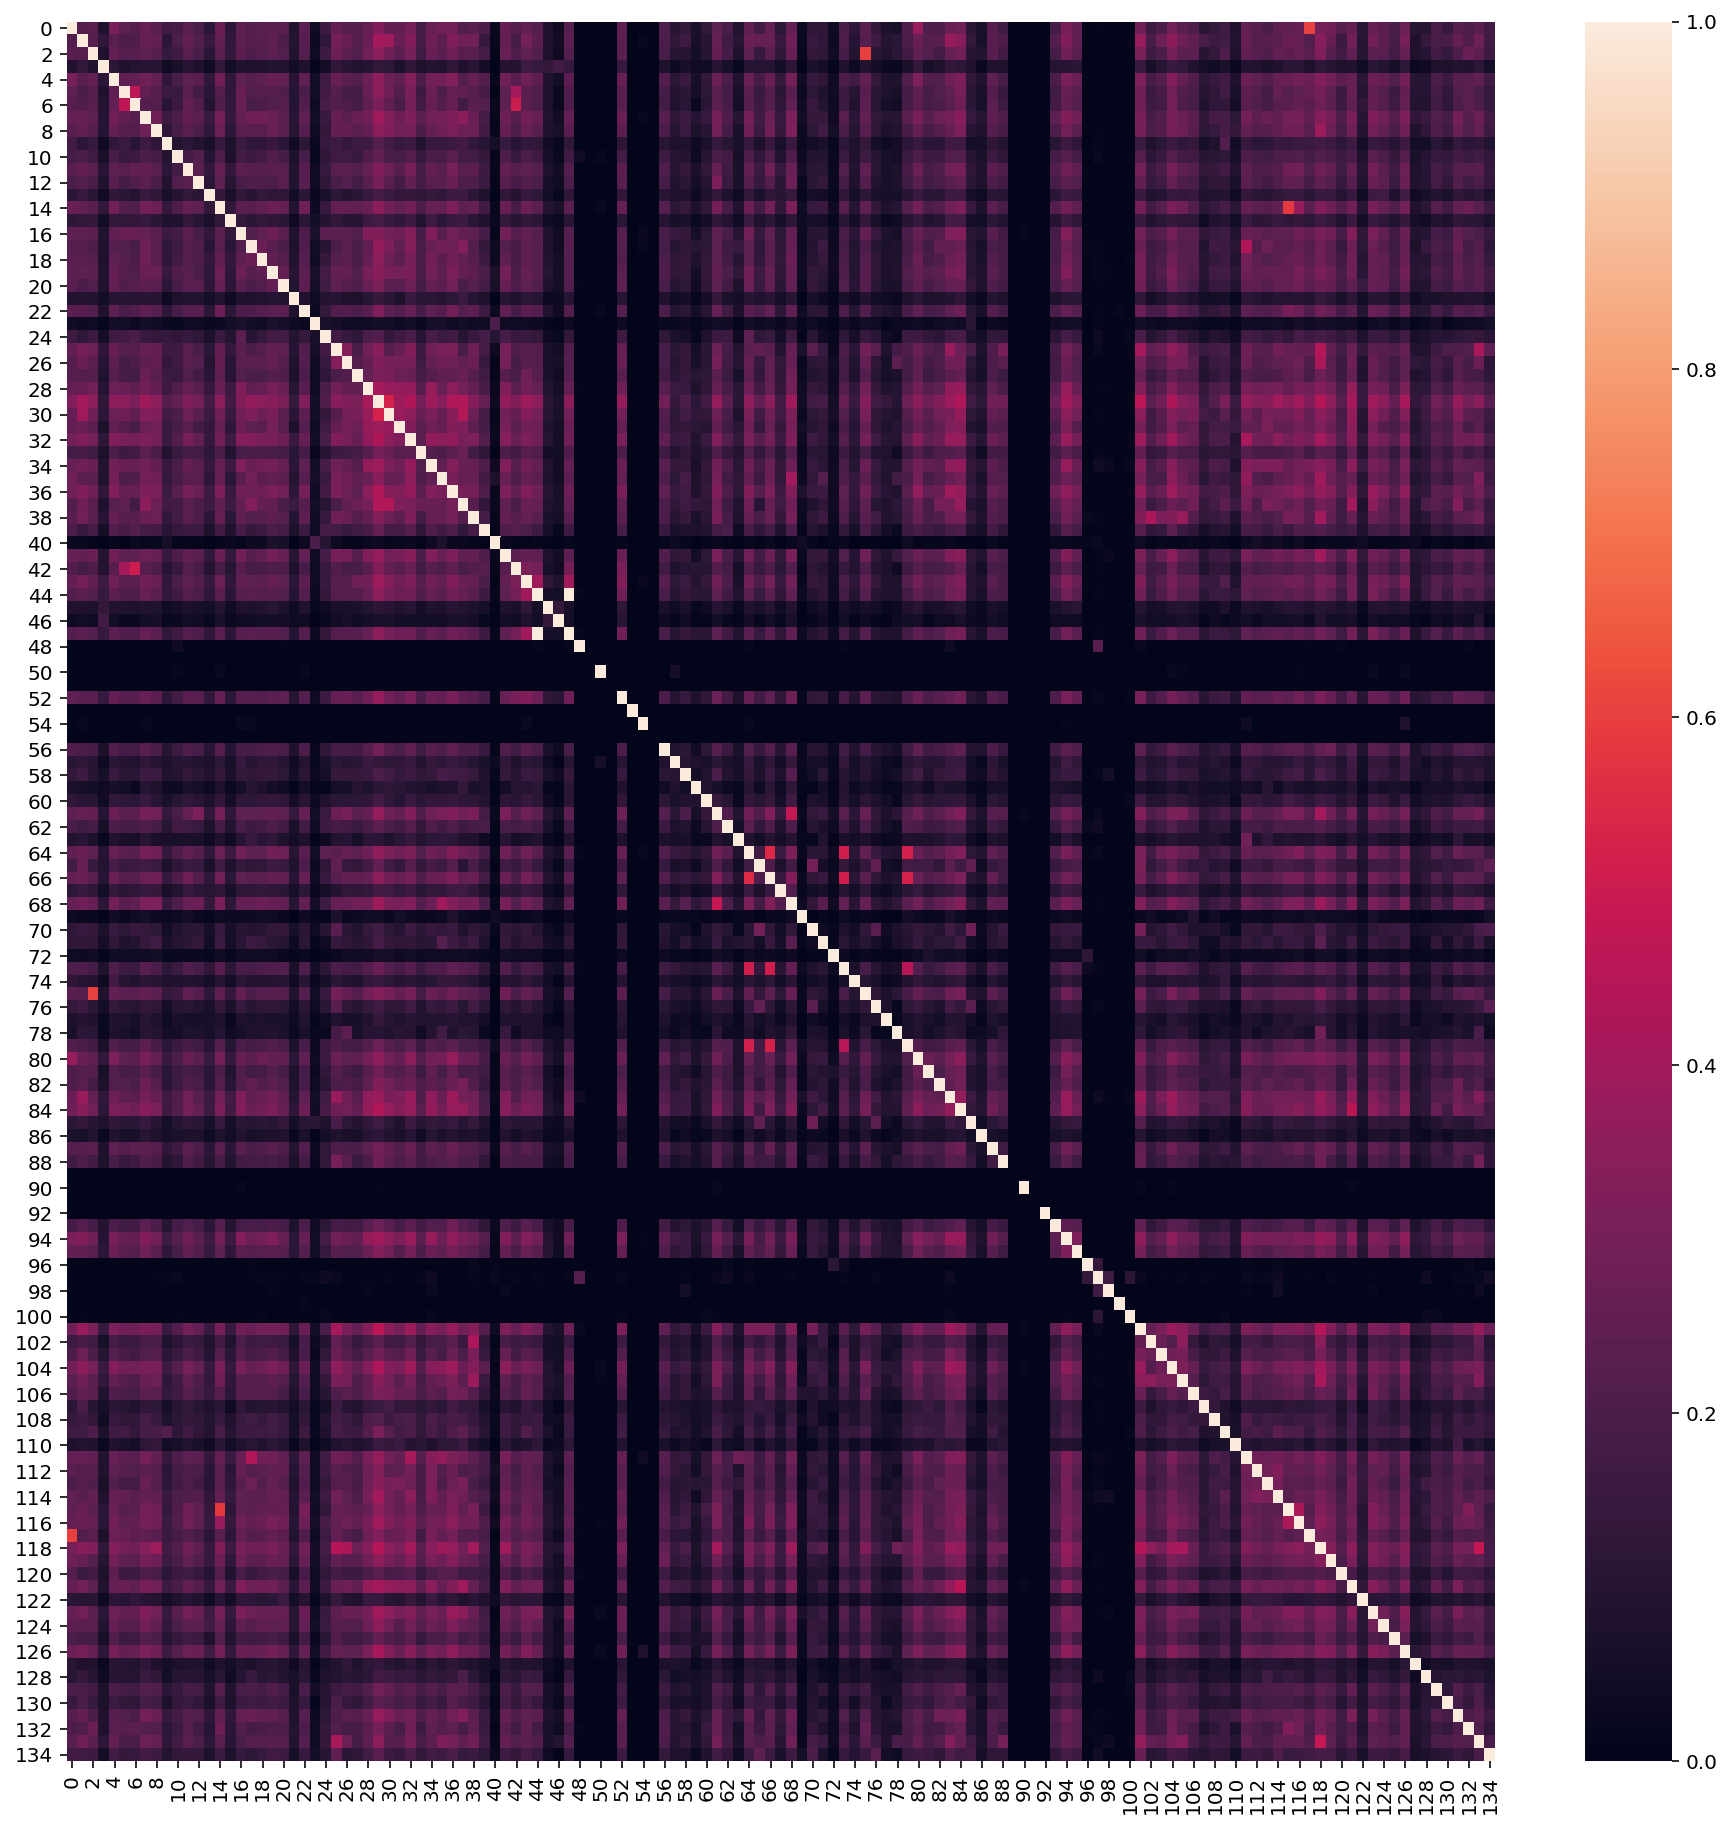

In [34]:
import seaborn as sns 
import matplotlib.pyplot as plt

plt.figure(figsize = (16,16))

sns.heatmap(doc_sim)

In [2]:
import joblib
text_clf = joblib.load("./text_clf.pkl")

In [15]:
text_clf.steps[1][1].coef_

array([[-2.26438048e-02, -2.49992720e-02,  7.11036587e-03, ...,
        -2.74196969e-06,  1.20640802e-06, -3.84457269e-06]])

In [19]:
import pandas as pd
coefs = text_clf.steps[1][1].coef_
feature_names = text_clf.steps[0][1].get_feature_names
feature_imp = pd.DataFrame(pd.Series(feature_names),pd.Series(coefs))

Exception: Data must be 1-dimensional